<a href="https://colab.research.google.com/github/asupraja3/ml-ng-notebooks/blob/main/LinearRegression_ScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Optional Lab: Linear Regression using Scikit-Learn

This lab demonstrates:
- Using **scikit-learn** to implement Linear Regression and SGD-based regression
- Scaling/normalizing features before training
- Comparing model coefficients


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler

# For reproducibility
np.set_printoptions(precision=2)


## 1. Generate synthetic 'house' dataset

In [2]:
# ----------------------------
# Create synthetic housing dataset
# ----------------------------

# Set random number generator for reproducibility
rng = np.random.default_rng(1)

# Number of training examples
m = 200

# Generate feature columns
size = rng.uniform(500, 3500, m)     # House size in sqft (continuous)
bedrooms = rng.integers(1, 6, m)     # Number of bedrooms (integer)
floors = rng.integers(1, 4, m)       # Number of floors (integer)
age = rng.uniform(0, 40, m)          # Age of house in years (continuous)

# Combine all features into a matrix of shape (m, 4)
X_train = np.c_[size, bedrooms, floors, age].astype(float)

# Define the "true" underlying weights for each feature
true_w = np.array([250,     # $ per sqft
                   10_000,  # $ per bedroom
                   5_000,   # $ per floor
                   -300])   # $ per year of age (negative = older house worth less)

# Define the "true" bias (base price)
true_b = 50_000

# Add random noise to simulate real-world variability
noise = rng.normal(0, 20_000, m)  # mean=0, std=20k

# Compute target prices using the true linear model + noise
y_train = X_train @ true_w + true_b + noise

# Feature names for reference
X_features = ["size(sqft)", "bedrooms", "floors", "age"]



## 2. Scale/normalize the training data

In [3]:

# Standardize features to mean=0 and std=1
# It will store the mean and standard deviation of each feature when you “fit” it.
scaler = StandardScaler()
#Below is doing feature scaling-specifically standardization (z-score normalization) in one step.
X_norm = scaler.fit_transform(X_train)

# Peak-to-Peak range (max - min) for each column
print(f"Peak to Peak range by column in Raw X: {np.ptp(X_train, axis=0)}")
print(f"Peak to Peak range by column in Normalized X: {np.ptp(X_norm, axis=0)}")


Peak to Peak range by column in Raw X: [2.98e+03 4.00e+00 2.00e+00 3.96e+01]
Peak to Peak range by column in Normalized X: [3.56 2.72 2.57 3.51]


## 3. Linear Regression (Normal Equation)

Intercept: 584871.8673801671
Coefficients: [209105.56  14643.1    1123.27  -6664.99]


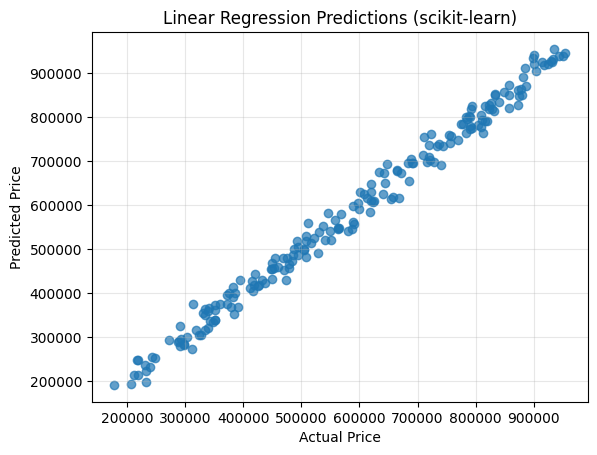

In [4]:
# Create and train a Linear Regression model using the normalized features
lr = LinearRegression()
lr.fit(X_norm, y_train)  # Fit the model to the standardized data

# Print model parameters
print("Intercept:", lr.intercept_)     # Bias term
print("Coefficients:", lr.coef_)       # Weights for each standardized feature

# Predict house prices on the training set
y_pred_lr = lr.predict(X_norm)

# Plot actual vs predicted prices
plt.scatter(y_train, y_pred_lr, alpha=0.7)  # alpha=0.7 for some transparency
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression Predictions (scikit-learn)")
plt.grid(True, alpha=0.3)
plt.show()


## ⚙️ How it works

### **1. Standard Gradient Descent (Batch GD)**
- Computes the gradient of the cost function using **all training examples** at each step.
- Each update is **accurate** but can be **slow** for large datasets.

### **2. Stochastic Gradient Descent (SGD)**
- Picks **one random training example** (or a very small batch) to approximate the gradient.
- Updates the weights **immediately** after processing that single example.


## 4. Linear Regression using SGDRegressor (Gradient Descent)

Intercept: [585993.39]
Coefficients: [ 2.09e+05  1.49e+04  9.77e+01 -6.72e+03]


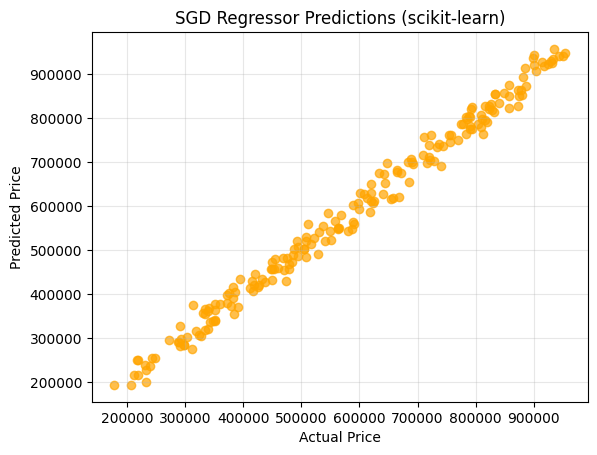

In [5]:
# Unlike LinearRegression (which solves the equation analytically), SGDRegressor iteratively updates
# weights using stochastic gradient descent.
# Create and train a Stochastic Gradient Descent Regressor
sgdr = SGDRegressor(
    max_iter=1000,          # Maximum number of passes over the data
    tol=1e-3,               # Stop if improvement is smaller than this
    penalty=None,           # No regularization (pure linear regression)
    eta0=0.01,               # Initial learning rate
    learning_rate='constant',# Keep learning rate fixed at eta0
    random_state=1           # For reproducibility
)
sgdr.fit(X_norm, y_train)   # Train using normalized features

# Print learned parameters
print("Intercept:", sgdr.intercept_)  # Bias term
print("Coefficients:", sgdr.coef_)    # Weights for each standardized feature

# Predict house prices on the training data
y_pred_sgd = sgdr.predict(X_norm)

# Plot actual vs predicted prices
plt.scatter(y_train, y_pred_sgd, alpha=0.7, color='orange')  # Orange for SGD predictions
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("SGD Regressor Predictions (scikit-learn)")
plt.grid(True, alpha=0.3)
plt.show()


## 📌 Visual Comparison: Batch GD vs Stochastic GD

**Left (Batch GD)** → Smooth, steady decline in cost because each step uses **all training data**.  
**Right (SGD)** → Noisier path because each step uses just **one sample** (or small batch), but it can **converge faster** in practice.

---


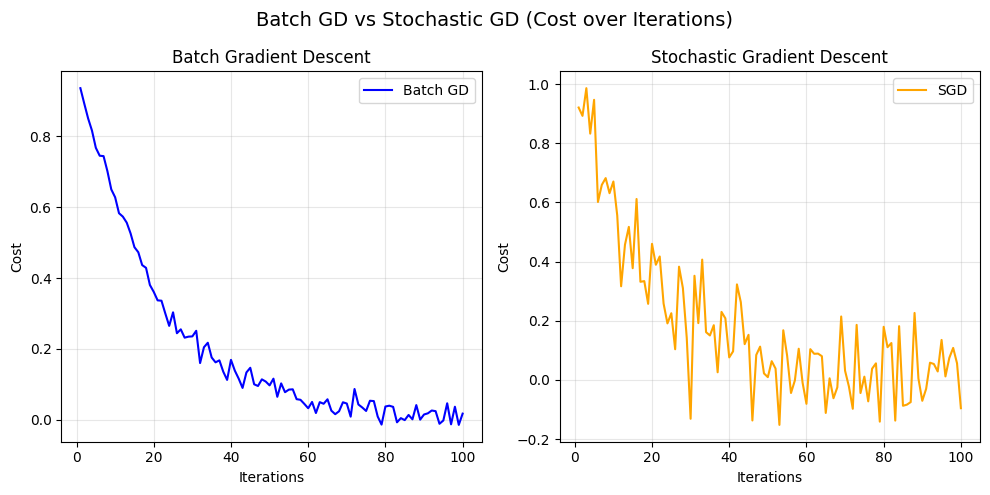

In [6]:
# 📊 Visualization: Batch Gradient Descent vs Stochastic Gradient Descent
import matplotlib.pyplot as plt
import numpy as np

# Simulated cost values for visualization
iterations = np.arange(1, 101)
cost_batch = np.exp(-iterations / 20) + 0.02 * np.random.randn(len(iterations))  # Smooth decay
cost_sgd = np.exp(-iterations / 20) + 0.1 * np.random.randn(len(iterations))     # Noisy decay

plt.figure(figsize=(10,5))

# Batch GD plot
plt.subplot(1,2,1)
plt.plot(iterations, cost_batch, label="Batch GD", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Batch Gradient Descent")
plt.grid(True, alpha=0.3)
plt.legend()

# SGD plot
plt.subplot(1,2,2)
plt.plot(iterations, cost_sgd, label="SGD", color="orange")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Stochastic Gradient Descent")
plt.grid(True, alpha=0.3)
plt.legend()

plt.suptitle("Batch GD vs Stochastic GD (Cost over Iterations)", fontsize=14)
plt.tight_layout()
plt.show()
